In [ ]:
!pip install igraph
!pip install leidenalg
!pip install cdlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.6 MB/s eta 0:00:00


In [ ]:
from cdlib import algorithms
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
df= pd.read_csv("cleaned_amazonian_species.csv")

In [ ]:
df.head()

,ID_especie,Especie,Nivel_trófico,Interacción_con,Tipo_de_interacción,Fuerza_de_interacción,Frecuencia_de_interacción,Impacto_ambiental
0,1,Mono emperador,Productor,Caimán enano,Simbiosis,6,33,3
1,3,Pez disco,Descomponedor,Nutria gigante,Parasitismo,7,15,4
2,4,Tarántula,Productor,Pez disco,Descomposición,3,9,6
3,5,Escorpión negro,Consumidor secundario,Hormiga bala,Competencia,5,35,9
4,6,Arapaima,Consumidor secundario,Murciélago vampiro,Competencia,9,6,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID_especie                 1000 non-null   int64 
 1   Especie                    1000 non-null   object
 2   Nivel_trófico              1000 non-null   object
 3   Interacción_con            1000 non-null   object
 4   Tipo_de_interacción        1000 non-null   object
 5   Fuerza_de_interacción      1000 non-null   int64 
 6   Frecuencia_de_interacción  1000 non-null   int64 
 7   Impacto_ambiental          1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
G = nx.DiGraph()

In [ ]:
for _, row in df.iterrows():
    G.add_edge(row['Especie'], row['Interacción_con'], weight=row['Fuerza_de_interacción'])

In [ ]:
for _, row in df.iterrows():
    G.add_node(row['Especie'], Nivel_trófico=row['Nivel_trófico'])
    G.add_edge(row['Especie'], row['Interacción_con'],
               Tipo_de_interacción=row['Tipo_de_interacción'],
               Fuerza_de_interacción=row['Fuerza_de_interacción'],
               Frecuencia_de_interacción=row['Frecuencia_de_interacción'],
               Impacto_ambiental=row['Impacto_ambiental'])

In [ ]:
G=G.to_undirected()

##### Algorithms

In [ ]:
louvain_coms = algorithms.louvain(G.to_undirected())

In [ ]:
communities = louvain_coms.communities

In [ ]:
louvain_coms.average_internal_degree(summary=False)

[5.411764705882353, 4.75, 4.533333333333333, 3.8, 4.4, 4.25]

In [ ]:
partition = community_louvain.best_partition(G)

# Calcular la modularidad
modularity = community_louvain.modularity(partition, G)

print(partition)

{'Mono emperador': 0, 'Caimán enano': 1, 'Pez disco': 1, 'Nutria gigante': 2, 'Tarántula': 3, 'Escorpión negro': 0, 'Hormiga bala': 2, 'Arapaima': 2, 'Murciélago vampiro': 2, 'Tamandúa': 5, 'Mono leoncito': 6, 'Guacamaya roja': 4, 'Cotorra': 1, 'Mono capuchino': 5, 'Rana arborícola': 3, 'Hormiga cortadora': 4, 'Hoatzin': 1, 'Martín pescador': 1, 'Pez gato': 1, 'Colibrí': 5, 'Pecarí': 6, 'Pez globo de agua dulce': 1, 'Mono choro': 6, 'Raya de agua dulce': 5, 'Chotacabras': 2, 'Pato criollo': 5, 'Tucán': 2, 'Jaguar': 4, 'Loro': 0, 'Mono pichico': 5, 'Mono belicoso': 5, 'Anaconda': 5, 'Rana venenosa': 2, 'Aguará guazú': 1, 'Libélula roja': 4, 'Mono nocturno': 2, 'Mono titi pigmeo': 2, 'Pez cuchillo': 2, 'Gallina de monte': 3, 'Tigrillo': 2, 'Mono lanudo': 2, 'Iguana': 2, 'Murciélago frutero': 3, 'Mono titi': 3, 'Serpiente coral': 6, 'Pez hacha': 2, 'Mono chorongo': 1, 'Mariposa cristal': 0, 'Oso hormiguero': 6, 'Puma': 2, 'Armadillo': 4, 'Mono barrigudo': 1, 'Carpintero': 1, 'Mono ardilla

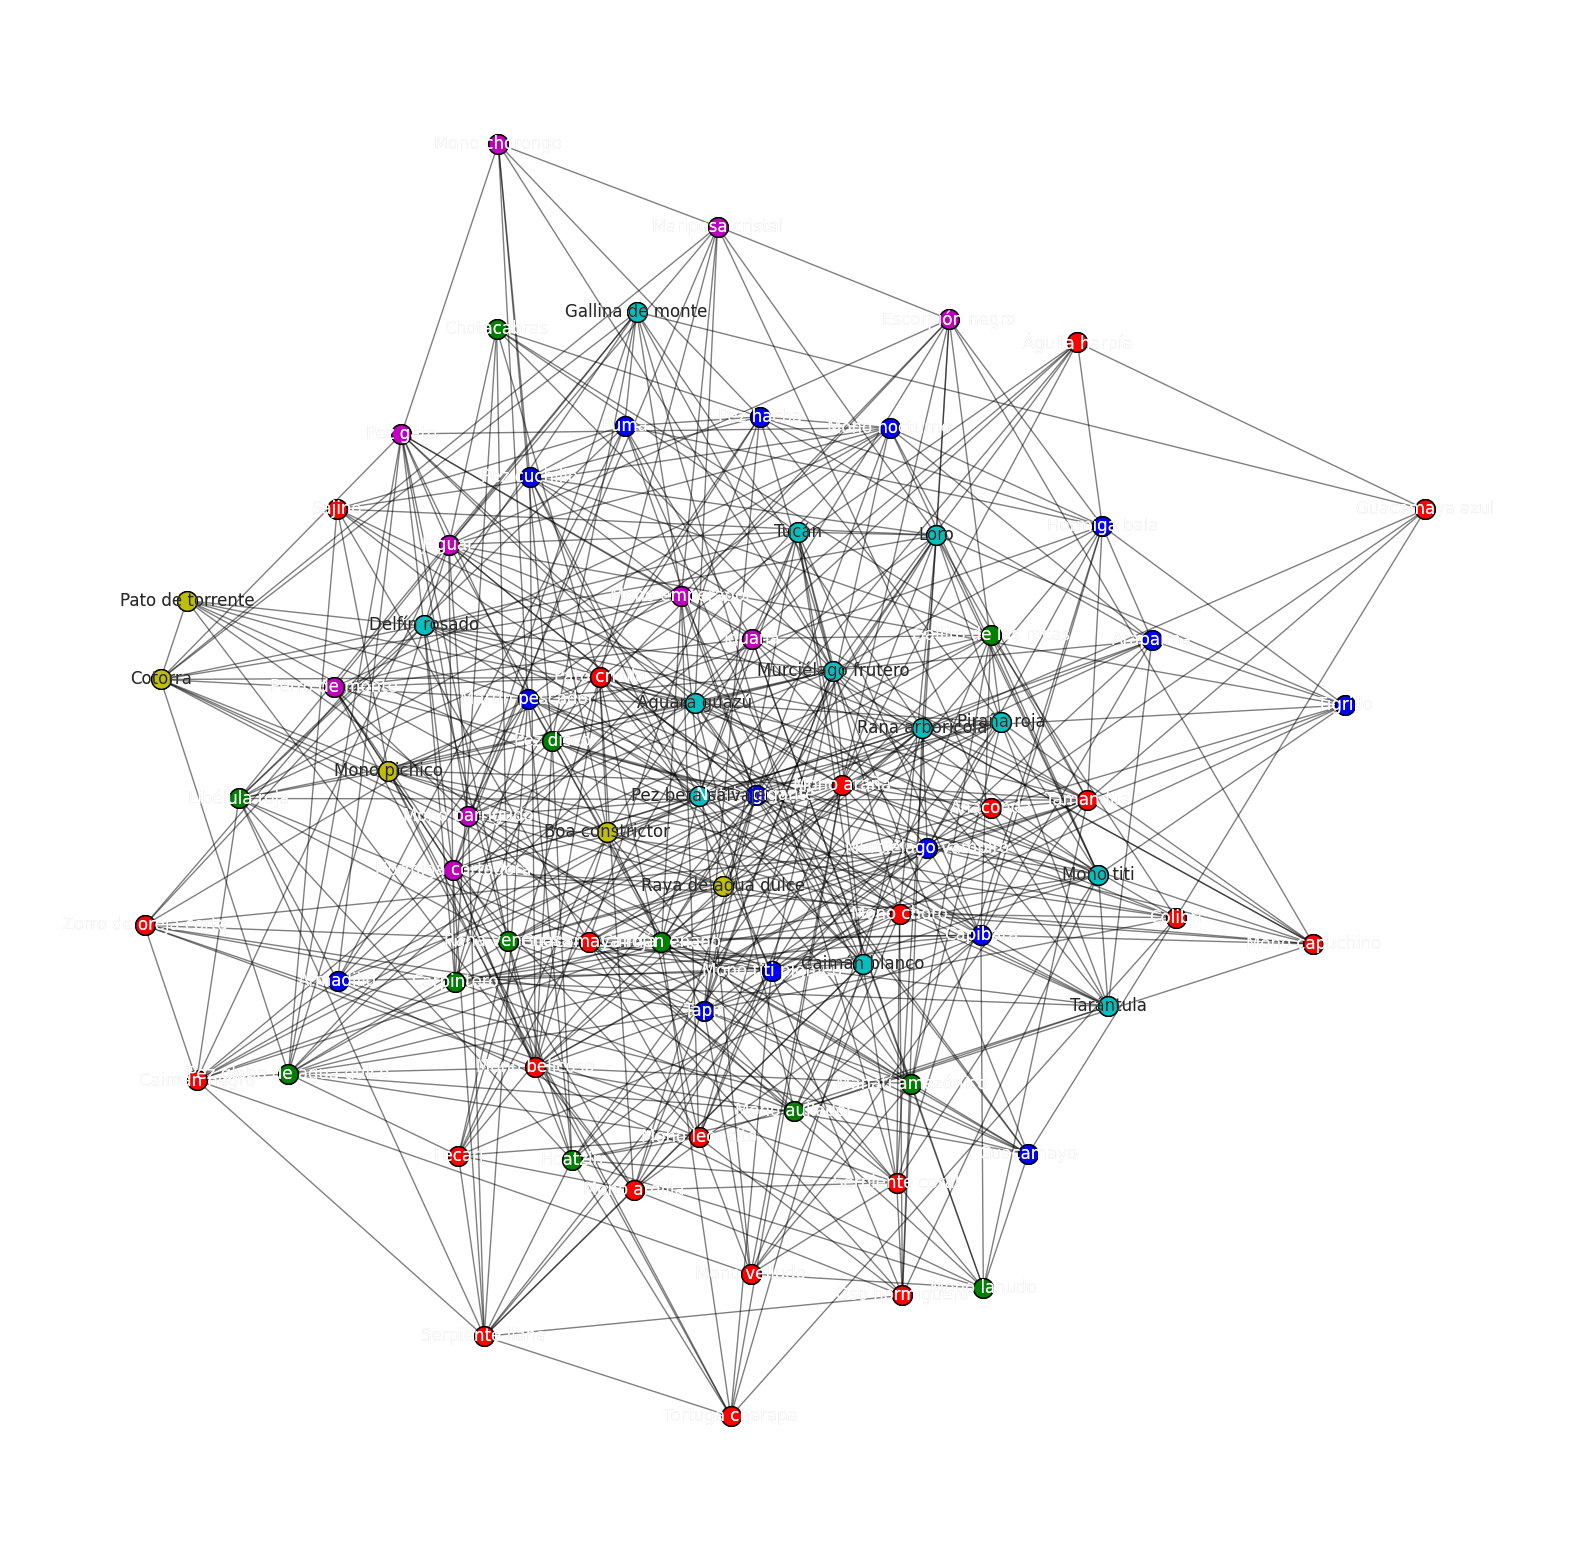

In [ ]:
from cdlib import viz

pos = nx.spring_layout(G.to_undirected())
viz.plot_network_clusters(G.to_undirected(), louvain_coms, pos, figsize=(20, 20), plot_labels=True)

In [ ]:
from collections import defaultdict

In [ ]:
community_data = defaultdict(list)
for i, community in enumerate(louvain_coms.communities):
    for species in community:
        community_data[f"Community {i+1}"].append(species)

In [ ]:
community_summary = []
for community_name, species_list in community_data.items():
    subgraph = G.subgraph(species_list)

    num_species = len(species_list)
    avg_interaction_strength = sum(nx.get_edge_attributes(subgraph, 'Fuerza_de_interacción').values()) / subgraph.number_of_edges()
    avg_interaction_frequency = sum(nx.get_edge_attributes(subgraph, 'Frecuencia_de_interacción').values()) / subgraph.number_of_edges()
    trophic_roles = [G.nodes[species]['Nivel_trófico'] for species in species_list if 'Nivel_trófico' in G.nodes[species]]
    trophic_role_distribution = {role: trophic_roles.count(role) for role in set(trophic_roles)}

    community_summary.append({
        "Community": community_name,
        "Numero de especies": num_species,
        "Promedio de fuerza de interaccion": avg_interaction_strength,
        "Promedio de frecuencia de interaccion": avg_interaction_frequency,
        "Distribucion de nivel trofico": trophic_role_distribution
    })



In [ ]:
key_species = []
for i, community in enumerate(louvain_coms.communities):
  subgraph = G.subgraph(community)
  degree_centrality = nx.degree_centrality(subgraph)
  for node in subgraph.nodes():
        key_species.append({
            "Community": f"Community {i+1}",
            "Species": node,
            "Degree Centrality": degree_centrality[node],
        })

In [ ]:
key_species_df = pd.DataFrame(key_species)

In [ ]:
top_key_species = key_species_df.sort_values(
    by=["Community", "Degree Centrality"], ascending=[True, False]
).groupby("Community").head(3)

In [ ]:
top_key_species

,Community,Species,Degree Centrality
6,Community 1,Mono araña,0.428571
18,Community 1,Tamandúa,0.428571
11,Community 1,Guacamaya roja,0.380952
32,Community 2,Arapaima,0.571429
33,Community 2,Hormiga bala,0.500000
22,Community 2,Pez hacha,0.428571
42,Community 3,Rana venenosa,0.545455
37,Community 3,Carpintero,0.454545
38,Community 3,Mono aullador,0.454545
49,Community 4,Delfín rosado,0.545455


In [ ]:
community_summary_df = pd.DataFrame(community_summary)

In [ ]:
community_summary_df

,Community,Numero de especies,Promedio de fuerza de interaccion,Promedio de frecuencia de interaccion,Distribucion de nivel trofico
0,Community 1,22,6.704918,24.049180,"{'Productor': 4, 'Consumidor secundario': 7, '..."
1,Community 2,15,7.447368,22.736842,"{'Productor': 3, 'Descomponedor': 5, 'Consumid..."
2,Community 3,12,7.708333,19.291667,"{'Productor': 3, 'Descomponedor': 2, 'Consumid..."
3,Community 4,12,7.531250,24.312500,"{'Productor': 1, 'Consumidor secundario': 4, '..."
4,Community 5,10,6.250000,25.350000,"{'Productor': 1, 'Consumidor secundario': 2, '..."
5,Community 6,5,8.000000,35.000000,"{'Productor': 2, 'Consumidor secundario': 1, '..."


Visualizacion de nodos

In [ ]:
!pip install pyvis factor_analyzer
from pyvis.network import Network
from IPython.display import HTML

In [ ]:
# Creamos un diccionario con los colores para nuestras comunidades
color_dict = {}
colors = ['#556B2F', '#8FBC8F', '#4682B4', '#87CEEB', '#D2B48C', '#A0522D']

# Asignar un color a cada nodo según su comunidad
for i, community in enumerate(communities):
    color = colors[i % len(colors)]
    for node in community:
        color_dict[node] = color

# Crear la red interactiva en 2D
net = Network(height='750px', width='100%', bgcolor='#ffffff', notebook=True, cdn_resources='in_line')

# Añadir los nodos con su información
for node in G.nodes(data=True):
    node_id = node[0]
    node_data = node[1]
    community_index = next(i for i, com in enumerate(communities) if node_id in com)
    title = f"Especie: {node_id}, Nivel trófico: {node_data.get('Nivel_trófico', 'N/A')}, Comunidad: {community_index}"
    net.add_node(node_id, color=color_dict[node_id], title=title)

# Añadir las aristas con su información
for edge in G.edges(data=True):
    edge_data = edge[2]
    title = (f"Tipo: {edge_data.get('Tipo_de_interacción', 'N/A')}, "
             f"Fuerza: {edge_data.get('Fuerza_de_interacción', 'N/A')}, "
             f"Frecuencia: {edge_data.get('Frecuencia_de_interaccion', 'N/A')}, "
             f"Impacto: {edge_data.get('Impacto_ambiental', 'N/A')}")

    # Usar la fuerza de interacción para el ancho de la arista
    width = float(edge_data.get('Fuerza_de_interacción', 1))

    net.add_edge(edge[0], edge[1], title=title, value=width)

# Configurar las opciones de visualización
net.set_options("""
var options = {
    "nodes": {
        "shape": "dot",
        "size": 15,
        "font": {
            "size": 12
        }
    },
    "edges": {
        "smooth": {
            "type": "continuous"
        },
        "width": 0.5,
        "color": {
            "opacity": 0.3
        },
        "scaling": {
            "min": 0.5,
            "max": 2
        }
    },
    "physics": {
        "enabled": true,
        "solver": "forceAtlas2Based",
        "forceAtlas2Based": {
            "gravitationalConstant": -50,
            "centralGravity": 0.01,
            "springLength": 200,
            "springConstant": 0.08,
            "damping": 0.4,
            "avoidOverlap": 1
        },
        "stabilization": {
            "enabled": true,
            "iterations": 1000,
            "updateInterval": 25
        }
    },
    "layout": {
        "improvedLayout": true,
        "hierarchical": {
            "enabled": false
        }
    },
    "interaction": {
        "navigationButtons": true,
        "hover": true,
        "zoomView": true,
        "dragView": true,
        "tooltipDelay": 100
    }
}
""")

# Guardar y mostrar el grafo
net.save_graph('communities_graph_complete.html')
HTML('communities_graph_complete.html')